In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st #skew,kurtosis,iqr
import seaborn as sns # boxplot
df=pd.read_csv('food-consumption.csv')
df

,Country,Real_coffee,Instant_coffee,Tea,Sweetener,Biscuits,Powder_soup,Tin_soup,Potatoes,Frozen_fish,...,Apples,Oranges,Tinned_fruit,Jam,Garlic,Butter,Margarine,Olive_oil,Yoghurt,Crisp_bread
0,Germany,90,49,88,19.0,57.0,51,19,21,27,...,81,75,44,71,22,91,85,74,30.0,26
1,Italy,82,10,60,2.0,55.0,41,3,2,4,...,67,71,9,46,80,66,24,94,5.0,18
2,France,88,42,63,4.0,76.0,53,11,23,11,...,87,84,40,45,88,94,47,36,57.0,3
3,Holland,96,62,98,32.0,62.0,67,43,7,14,...,83,89,61,81,15,31,97,13,53.0,15
4,Belgium,94,38,48,11.0,74.0,37,23,9,13,...,76,76,42,57,29,84,80,83,20.0,5
5,Luxembourg,97,61,86,28.0,79.0,73,12,7,26,...,85,94,83,20,91,94,94,84,31.0,24
6,England,27,86,99,22.0,91.0,55,76,17,20,...,76,68,89,91,11,95,94,57,11.0,28
7,Portugal,72,26,77,2.0,22.0,34,1,5,20,...,22,51,8,16,89,65,78,92,6.0,9
8,Austria,55,31,61,15.0,29.0,33,1,5,15,...,49,42,14,41,51,51,72,28,13.0,11
9,Switzerland,73,72,85,25.0,31.0,69,10,17,19,...,79,70,46,61,64,82,48,61,48.0,30


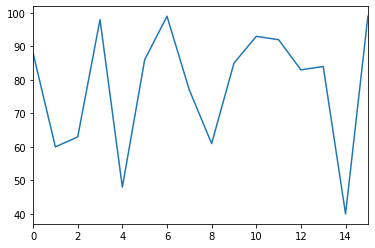

In [2]:
df.Tea.plot()

In [3]:
df.Tea.sort_values()

14    40
4     48
1     60
8     61
2     63
7     77
12    83
13    84
9     85
5     86
0     88
11    92
10    93
3     98
6     99
15    99
Name: Tea, dtype: int64

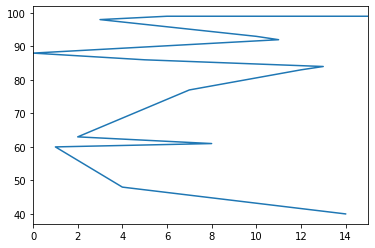

In [4]:
df.Tea.sort_values().plot()

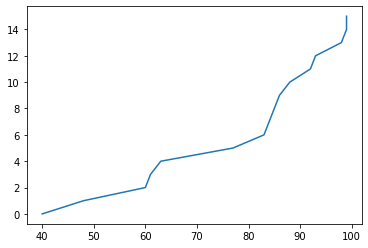

In [10]:
def fn1(x):
    for i in x:
        if(x(i)==x(i+1)):
            c=c+1
fn1(df['Tea'].tolist())    

TypeError: 'list' object is not callable

In [6]:
df['Tea'].value_counts()

99    2
63    1
93    1
92    1
88    1
86    1
85    1
84    1
83    1
48    1
77    1
61    1
60    1
40    1
98    1
Name: Tea, dtype: int64

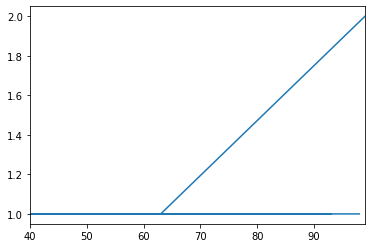

In [7]:
df['Tea'].value_counts().plot()

In [11]:
df['Tea'].tolist()

[88, 60, 63, 98, 48, 86, 99, 77, 61, 85, 93, 92, 83, 84, 40, 99]

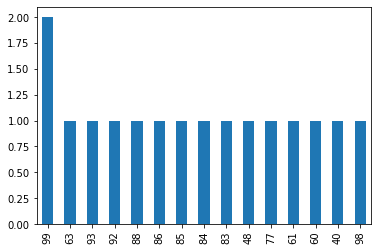

In [12]:
df['Tea'].value_counts().plot(kind='bar')

In [13]:
df=pd.read_csv('mt_cars.csv')
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110.0,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110.0,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93.0,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110.0,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,NaN,8,360.0,175.0,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105.0,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245.0,NaN,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62.0,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95.0,NaN,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,NaN,123.0,3.92,3.440,18.30,1,0,4,4


In [14]:
df.isnull().sum()

model    0
mpg      5
cyl      0
disp     8
hp       7
drat     6
wt       4
qsec     1
vs       0
am       0
gear     0
carb     0
dtype: int64

In [15]:
df['qsec'].fillna(method='ffill',inplace=True)

In [16]:
df.isnull().sum()

model    0
mpg      5
cyl      0
disp     8
hp       7
drat     6
wt       4
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

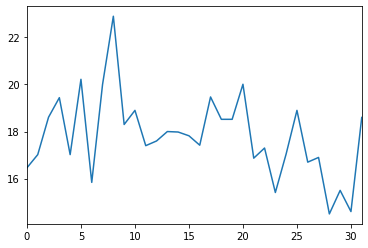

In [17]:
df['qsec'].plot()

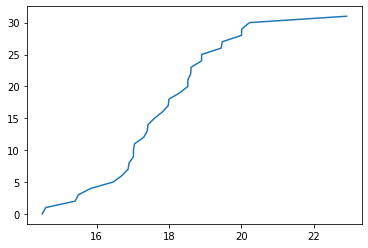

In [20]:
x=df.qsec.sort_values()
y=np.arange(0,32)
plt.plot(x,y)

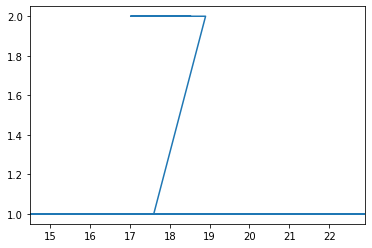

In [22]:
df['qsec'].value_counts().plot()